· read image “tulips.jpg”

· change its background to blue, black, green, red and record all of them as new images

· using matplotlib display original image and four images that have been generate

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt


img = cv2.imread('/content/tulips.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]
mask = 255 - mask

kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask 

tmask = result[:,:,3] == 0
result[tmask]=[255, 0, 0, 255]
cv2.imwrite('blue.png', result)
result[tmask]=[0, 0, 0, 255]
cv2.imwrite('black.png', result)
result[tmask]=[0, 255, 0, 255]
cv2.imwrite('green.png', result)
result[tmask]=[0, 0, 255, 255]
cv2.imwrite('red.png', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

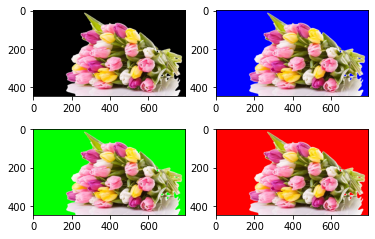

In [ ]:
black = cv2.imread('black.png')
green = cv2.imread('green.png')
red = cv2.imread('red.png')
blue = cv2.imread('blue.png')

fig, axs = plt.subplots(2,2)
axs[0,0].imshow(cv2.cvtColor(black, cv2.COLOR_BGR2RGB))
axs[1,0].imshow(cv2.cvtColor(green, cv2.COLOR_BGR2RGB))
axs[1,1].imshow(cv2.cvtColor(red, cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cv2.cvtColor(blue, cv2.COLOR_BGR2RGB))
